In [35]:
# loading the scrapper & analysis functions
from comment_crawler import *
from comment_crawler_analysis import *
from graphs_and_charts import *
from authors_names import *

In [36]:
%run comment_crawler.py
%run comment_crawler_analysis.py
%run graphs_and_charts.py
%run authors_names.py

#### Define the starting urls list:

In [3]:
starting_urls_list

['https://mymadison.io/documents/city-of-buffalo-open-data-policy',
 'https://mymadison.io/documents/durham-open-data-policy',
 'https://mymadison.io/documents/city-of-tyler-data-policy',
 'https://mymadison.io/documents/city-of-glendale-draft-open-data-resolution',
 'https://mymadison.io/documents/metro-nashville-government-open-data-policy',
 'https://mymadison.io/documents/city-of-syracuse-open-data-policy',
 'https://mymadison.io/documents/napervilleopendatapolicy',
 'https://mymadison.io/documents/bart-open-data-policy',
 'https://mymadison.io/documents/san-francisco-open-data-legislation-2014']

### Scrapping all the open data policy comments and policy texts for all Madison websites and putting them into dataframes

In [4]:
all_madison_dfs, all_cities_dataframe, full_policy_text = go_all_madison_websites(starting_urls_list)

/Users/summerfellow/anaconda/envs/py35/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/summerfellow/anaconda/envs/py35/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "html5lib")

  markup_type=markup_type))


In [33]:
for name, city, policy in all_madison_dfs:
    print(name)

Buffalo
Durham
Tyler
Glendale
Nashville
Syracuse
Naperville
Bart
San Francisco


# Analysis

# 1.1) Most common words used

## a) most common words in quoted texts (policy sections)

### for all the cities combined


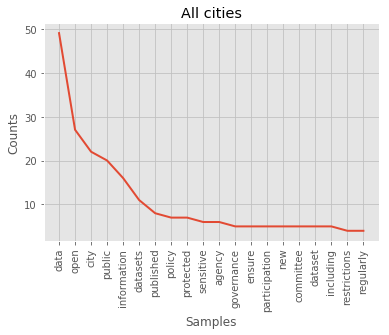

(             word  quoted_text_count
 0            data                 49
 1            open                 27
 2            city                 22
 3          public                 20
 4     information                 16
 5        datasets                 11
 6       published                  8
 7          policy                  7
 8       protected                  7
 9       sensitive                  6
 10         agency                  6
 11     governance                  5
 12         ensure                  5
 13  participation                  5
 14            new                  5
 15      committee                  5
 16        dataset                  5
 17      including                  5
 18   restrictions                  4
 19      regularly                  4, None)

In [6]:
common_words_quoted_texts("quoted_text", "All cities", all_cities_dataframe, 20, "both")

## b) most common words in actual comments

### for all the cities combined


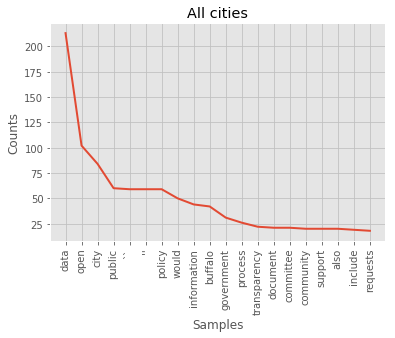

(            word  quoted_text_count
 0           data                213
 1           open                102
 2           city                 84
 3         public                 60
 4             ``                 59
 5             ''                 59
 6         policy                 59
 7          would                 50
 8    information                 44
 9        buffalo                 42
 10    government                 31
 11       process                 26
 12  transparency                 22
 13      document                 21
 14     committee                 21
 15     community                 20
 16       support                 20
 17          also                 20
 18       include                 19
 19      requests                 18, None)

In [7]:
common_words_quoted_texts("comment_text", "All cities", all_cities_dataframe, 20, "both")

# 1.2) compare quoted-word frequency with in-the-whole-policy word frequency

### for all cities

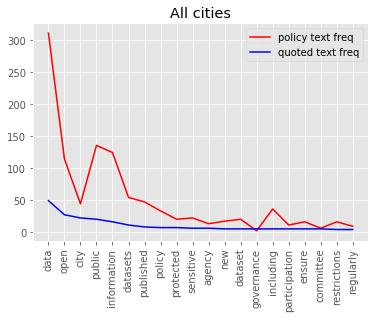

,word,policy_text_freq,quoted_text_count,ratio
0,data,310,49,0.16
4,open,114,27,0.24
6,city,44,22,0.50
12,public,135,20,0.15
16,information,124,16,0.13
8,datasets,54,11,0.20
3,published,47,8,0.17
13,policy,33,7,0.21
19,protected,20,7,0.35
14,sensitive,22,6,0.27


In [37]:
ratio_quoted_freq_with_policy_freq("quoted_text", "All cities", all_cities_dataframe, 20, full_policy_text, "single")

### for each individual city

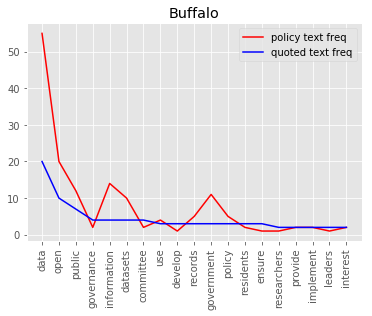

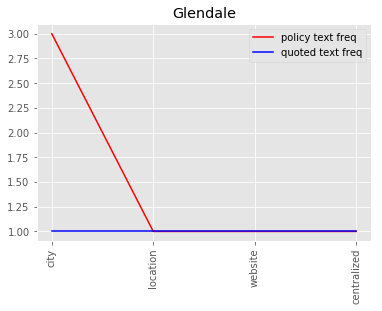

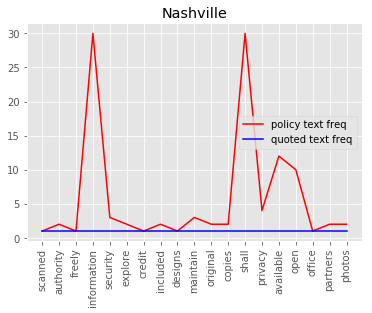

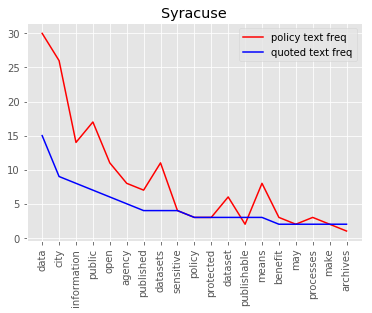

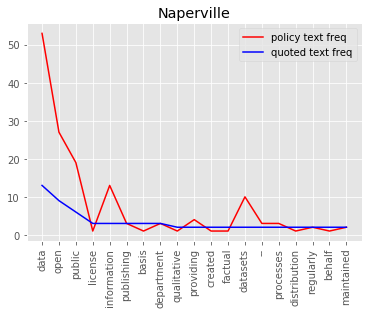

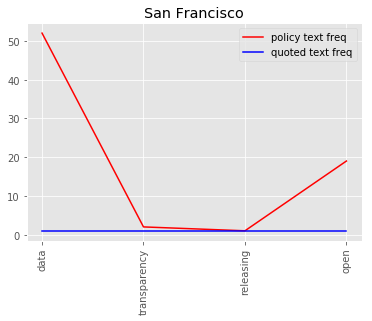

In [38]:
for name, city, policy_text in all_madison_dfs:
    ratio_quoted_freq_with_policy_freq("quoted_text", name, city, 20, policy_text, "single")

# 2) Sentiment Analysis

## a) sentiment analysis graphs for each city for comments of most commonly quoted policy sections

positive sentence: That would be super helpful :)

total_comments: 12 --- city name: Buffalo


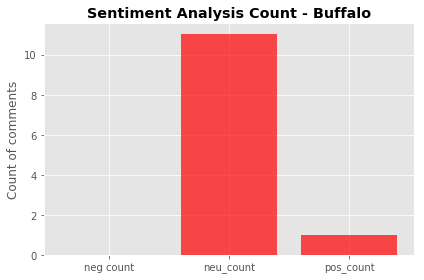

None

total_comments: 1 --- city name: Glendale


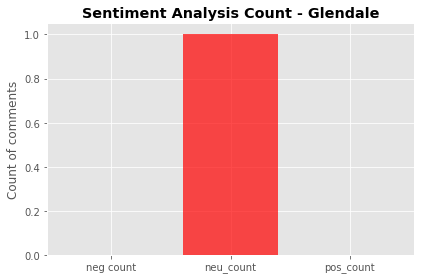

None
positive sentence: Cheers for this!
positive sentence: Awesome!

total_comments: 3 --- city name: Nashville


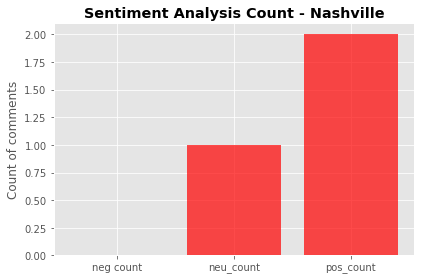

None
positive sentence: redundant - protect & sensitive are ultimately the same

total_comments: 8 --- city name: Syracuse


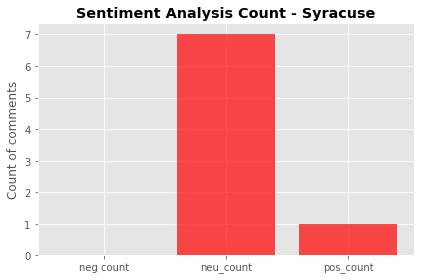

None
positive sentence: Datasets should also be analyzed and improved to be customer friendly.

total_comments: 8 --- city name: Naperville


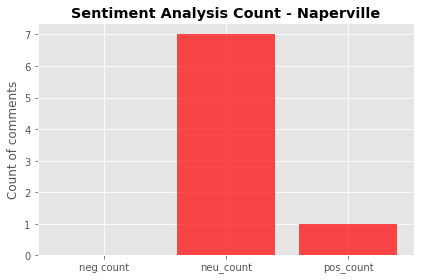

None

total_comments: 1 --- city name: San Francisco


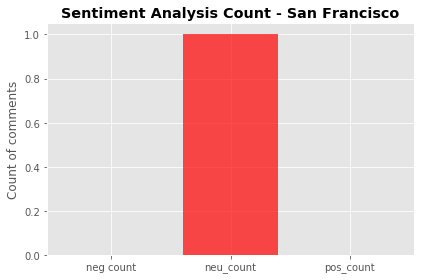

None


In [165]:
sentimental_analysis_graphs_1 = top_policy_sections_commented(all_madison_dfs, "most_common_policy", 3)

## b) sentiment analysis graphs for each city for all comments

positive sentence: equitable access to opportunity (open data can help move us closer to this goal)
negative sentence: risks to the public
positive sentence: this is amazing. Very important.
positive sentence: protected information
positive sentence: A central location is a good idea, IMHO
positive sentence: That would be super helpful :)

total_comments: 66 --- city name: Buffalo


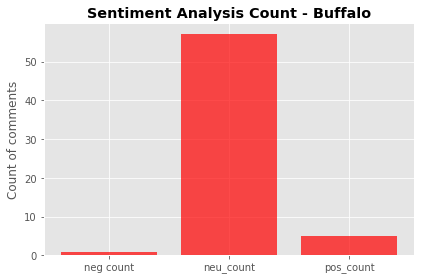

None

total_comments: 1 --- city name: Durham


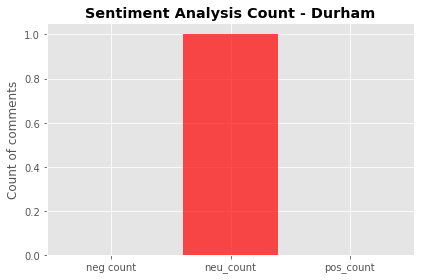

None

total_comments: 4 --- city name: Tyler


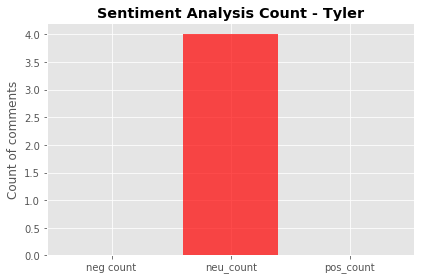

None
positive sentence: This resource would be of great value to the Human Resources Commission.  The demographic information would help serve as a guide to commission activities.  Kudos for the concept.

total_comments: 10 --- city name: Glendale


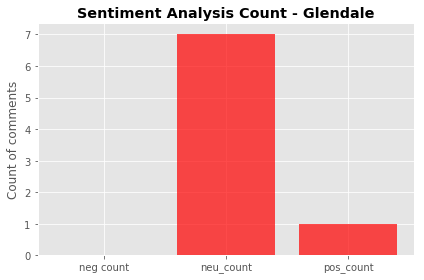

None
positive sentence: Awesome!
positive sentence: Cheers for this!

total_comments: 6 --- city name: Nashville


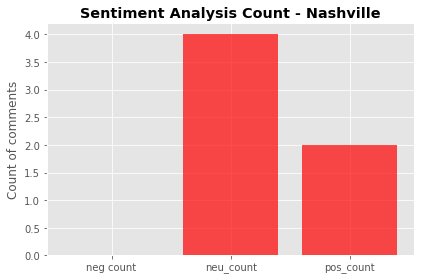

None
positive sentence: "Permanence" is a strong guarantee a priori, and could imply quadratically growing storage costs (e.g., if you save a bunch of snapshots). Also, publishing "with permanence" is a weird phrase. :)
positive sentence: redundant - protect & sensitive are ultimately the same
positive sentence: YES
positive sentence: This is terrific. A solid policy that will serve the city well and provide important guidance to city departments for releasing open data.
positive sentence: This would be a great opportunity for Syracuse to organize some community resources in a way that can increase civic engagement and generate transparency and accountability.

total_comments: 50 --- city name: Syracuse


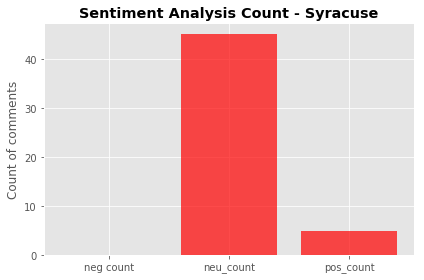

None
positive sentence: Datasets should also be analyzed and improved to be customer friendly.
positive sentence: Metadata helps users understand a dataset
positive sentence: Great idea. I would like to see how data is classified into private and public.

total_comments: 24 --- city name: Naperville


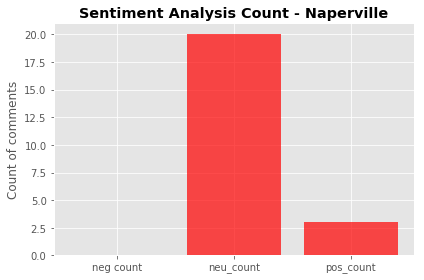

None

total_comments: 1 --- city name: Bart


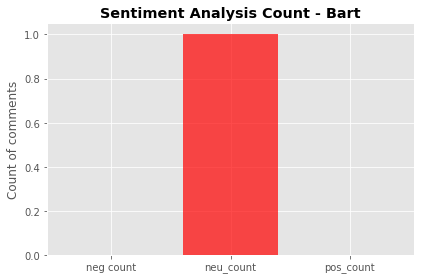

None
positive sentence: LOL

total_comments: 2 --- city name: San Francisco


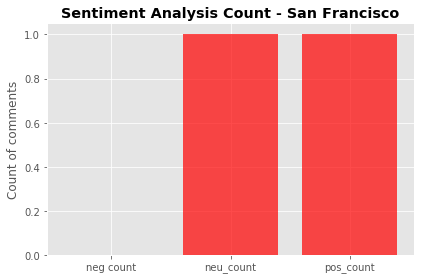

None


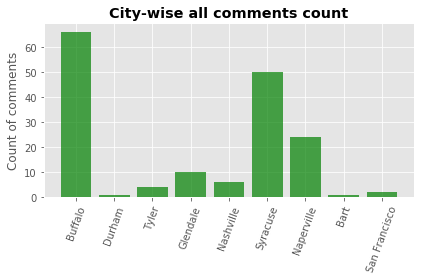

None


In [166]:
sentimental_analysis_graphs_2 = top_policy_sections_commented(all_madison_dfs, "all_common_comments", 3)

## c) sentiment analysis graphs for all the cities (aggregate) for most commonly quoted policy sections

positive sentence: Datasets should also be analyzed and improved to be customer friendly.

total_comments: 12 --- city name: All Cities


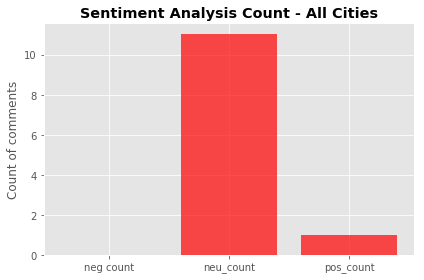

In [167]:
sentimental_analysis_graphs_3 = top_policy_sections_commented(all_cities_dataframe, "most_common_policy", 4)

## d) sentiment analysis for all the cities (aggregate) for all comments

positive sentence: equitable access to opportunity (open data can help move us closer to this goal)
negative sentence: risks to the public
positive sentence: this is amazing. Very important.
positive sentence: protected information
positive sentence: A central location is a good idea, IMHO
positive sentence: That would be super helpful :)
positive sentence: This resource would be of great value to the Human Resources Commission.  The demographic information would help serve as a guide to commission activities.  Kudos for the concept.
positive sentence: Awesome!
positive sentence: Cheers for this!
positive sentence: "Permanence" is a strong guarantee a priori, and could imply quadratically growing storage costs (e.g., if you save a bunch of snapshots). Also, publishing "with permanence" is a weird phrase. :)
positive sentence: redundant - protect & sensitive are ultimately the same
positive sentence: YES
positive sentence: This is terrific. A solid policy that will serve the city well a

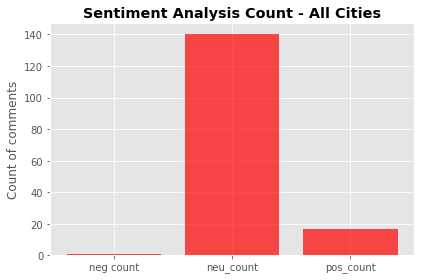

In [168]:
sentimental_analysis_graphs_4 = top_policy_sections_commented(all_cities_dataframe, "all_common_comments", 3)

# 3) Analyzing the most popular policy sections

## 3.1) four words long popular policy quotes

In [169]:
popular_sections = sentimental_analysis_graphs_3[3]
filtered_pop_sections = pd.DataFrame()

for phrase, count in popular_sections:
    filtered_pop_sections = filtered_pop_sections.append(all_cities_dataframe[all_cities_dataframe['quoted_text'].astype(str).str.contains(phrase)])

filtered_pop_sections_4 = filtered_pop_sections.reset_index()

In [170]:
popular_sections #popular sections phrases, number of times they are quoted

[('Open Data Governance Committee', 5),
 ('protected and sensitive information', 4),
 ('and sensitive information ;', 3),
 ('Develop and implement a', 3),
 ('the Open Data Governance', 3),
 ('implement a process for', 3),
 ('the city ’ s', 3),
 ('and implement a process', 3),
 ('of the City .', 2),
 ('providing regular opportunities for', 2)]

In [171]:
filtered_pop_sections_4 = filtered_pop_sections_4.drop_duplicates("comment_text")

In [172]:
for index, row in filtered_pop_sections_4.iterrows():
    print('\033[1m' + "City:", row['city_name'])
    print('\033[0m' + "Partial quoted text:", row['quoted_text'])
    print('\033[1m' + "Comment text:", row['comment_text'])
    print('\033[1m' + "Number of likes:", row['num_likes'])
    print()

City: Buffalo
Partial quoted text: Open Data Governance Committee
Comment text: Minutes from any and all meetings of this committee should be made available in machine-readable formats in an easily-accessible location (including within the open data system)
Number of likes: 1

City: Buffalo
Partial quoted text: Open Data Governance Committee
Comment text: How will this committee be formed?  Will it be comprised of community stakeholders or only government employees/officials?
Number of likes: 0

City: Buffalo
Partial quoted text: periodically update the data based on internal and external needs; serve on the Open Data Governance Committee; upon request, meet with the Open Data Governance Committee to discuss any matter pertaining to implementation of this Order; and assist in the preparation of the annual open data compliance report.
Comment text: Would this liaison be the contact person if a dataset user (ie a student doing a project or a researcher) had questions about the set?
Numbe

In [173]:
# hand-made (this needs eye-balling)
main_policies = ['Open Data Governance Committee', "Opportunities for Citizen Feedback", 'Privacy and Security', 'Useful, quality and timely data', "Prioritizing the release of open data", "Bulk Download"]
count_pop_policies = [3, 1, 5, 2, 2, 2]

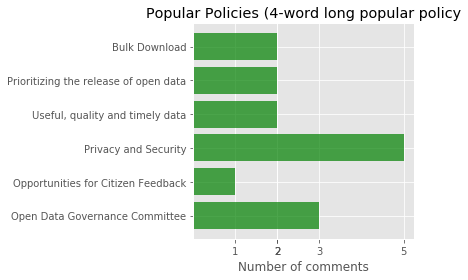

In [174]:
horizontal_bar(main_policies, count_pop_policies, "Number of comments", "Popular Policies (4-word long popular policy")

## 3.2) three words long popular policy quotes

positive sentence: That would be super helpful :)
positive sentence: Datasets should also be analyzed and improved to be customer friendly.
positive sentence: this is amazing. Very important.

total_comments: 18 --- city name: All Cities


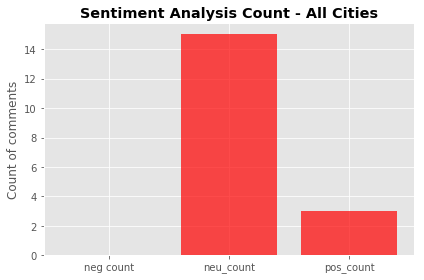

In [175]:
sentimental_analysis_graphs_3_3words = top_policy_sections_commented(all_cities_dataframe, "most_common_policy", 3)

In [176]:
popular_sections_3 = sentimental_analysis_graphs_3_3words[3]
filtered_pop_sections_3 = pd.DataFrame()

for phrase, count in popular_sections_3:
    filtered_pop_sections_3 = filtered_pop_sections_3.append(all_cities_dataframe[all_cities_dataframe['quoted_text'].astype(str).str.contains(phrase)])

filtered_pop_sections_3 = filtered_pop_sections_3.reset_index()

In [177]:
popular_sections_3 #popular sections phrases, number of times they are quoted

[('the Open Data', 6),
 ('Data Governance Committee', 5),
 ('Open Data Governance', 5),
 ('and sensitive information', 4),
 ('on behalf of', 4),
 ('of the City', 4),
 ('protected and sensitive', 4),
 ('the public ,', 3),
 ('implement a process', 3),
 ('a process for', 3)]

In [178]:
filtered_pop_sections_3 = filtered_pop_sections_3.drop_duplicates("comment_text")

In [179]:
for index, row in filtered_pop_sections_3.iterrows():
    print('\033[1m' + "City:", row['city_name'])
    print('\033[0m' + "Partial quoted text:", row['quoted_text'])
    print('\033[1m' + "Comment text:", row['comment_text'])
    print('\033[1m' + "Number of likes:", row['num_likes'])
    print()

City: Buffalo
Partial quoted text: Provide for a future means of digitizing archived material that was in existence prior to the development of the Open Data Program;
Comment text: That would be super helpful :)
Number of likes: 0

City: Buffalo
Partial quoted text: periodically update the data based on internal and external needs; serve on the Open Data Governance Committee; upon request, meet with the Open Data Governance Committee to discuss any matter pertaining to implementation of this Order; and assist in the preparation of the annual open data compliance report.
Comment text: Would this liaison be the contact person if a dataset user (ie a student doing a project or a researcher) had questions about the set?
Number of likes: 1

City: Buffalo
Partial quoted text: Develop and implement a process for prioritizing the release of datasets to the Open Data Portal which takes into account new and existing signals of interest from the public (such as the frequency of FOIL requests), th

In [180]:
# hand-made (this needs eye-balling)
main_policies_3 = ['Open Data Governance Committee', 'Opportunities for Citizen Feedback', "Open Data Impacting City's Priorities", 'Privacy and Security', 'Useful, quality and timely data', 'Prioritizing the release of open data', 'Bulk Download']
count_pop_policies_3 = [4, 1, 1, 4, 4, 3, 0]

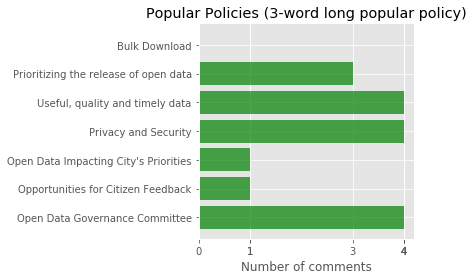

In [284]:
horizontal_bar(main_policies_3, count_pop_policies_3, "Number of comments", "Popular Policies (3-word long popular policy)")

# 4) Analyzing positive and negative sentiments

In [182]:
neg_count = sentimental_analysis_graphs_4[0][1]
neu_count = sentimental_analysis_graphs_4[0][3]
pos_count = sentimental_analysis_graphs_4[0][5]

/Users/summerfellow/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/legend.py:326: UserWarning: Unrecognized location "upper corner". Falling back on "best"; valid locations are
	lower right
	lower center
	upper center
	upper left
	center left
	lower left
	right
	center
	upper right
	center right
	best

  six.iterkeys(self.codes))))


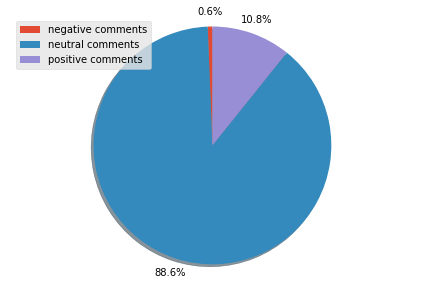

In [183]:
labels = ['negative comments', 'neutral comments', 'positive comments']
sizes = [neg_count, neu_count, pos_count]

pie_chart(sizes, labels, 'sentiment-analysis-pie-chart')

### a) Positive comments

In [184]:
pos_comments = sentimental_analysis_graphs_4[2]

In [185]:
pos_comments_dict = all_cities_dataframe[all_cities_dataframe['comment_text'].isin(pos_comments)].reset_index()

In [186]:
pos_comments_dict.head()

,index,comment_id,author,datetime,num_likes,quoted_text,comment_text,comment_text_aux,reply_ids,reply_ids_count,city_name
0,8,E4-XFm_mHqw,Aaron Krolikowski,2017-01-24 22:35:13,0,opportunity,equitable access to opportunity (open data can...,<p>equitable access to opportunity (open data ...,[],0,Buffalo
1,49,E4-XFe4h4Dg,Andrew Nicklin,2017-01-17 02:56:54,1,including the records of third-party agency co...,this is amazing. Very important.,<p>this is amazing. Very important.</p>,"[E4-XFhzeuLI, E4-XFh74V00, E4-XFibN984, E4-XFm...",4,Buffalo
2,50,E4-XFesw1OU,Andrew Nicklin,2017-01-17 02:51:48,0,protected,protected information,<p>protected information</p>,[E4-XFexnyeI],1,Buffalo
3,55,E4-XFeauO2Q,Chris Slocum,2017-01-17 02:09:14,1,Maintain an open data portal that provides a c...,"A central location is a good idea, IMHO","<p>A central location is a good idea, IMHO</p>","[E4-XFe2EPUI, E4-XFgWX6pU, E4-XFgo3z-w, E4-XFi...",4,Buffalo
4,58,E4-XFeQv5eo,Chris Slocum,2017-01-17 02:01:09,0,Provide for a future means of digitizing archi...,That would be super helpful :),<p>That would be super helpful :)</p>,[E4-XFfO0BWs],1,Buffalo


In [187]:
# hard-coded - (needs eye-balling)

pos_main_policies = ['Open Data Governance Committee', "Open Data Access", "Opportunities for Citizen Feedback", 'Privacy and Security', 'Useful, quality and timely data', "Prioritizing the release of open data", "Bulk Download"]
count_pos_policies = [1, 2, 1, 0, 5, 1, 0]

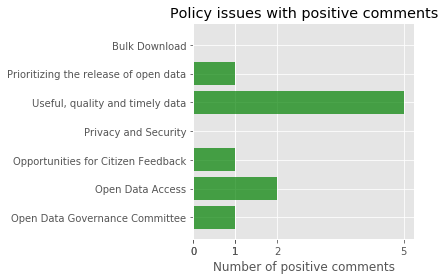

In [188]:
horizontal_bar(pos_main_policies, count_pos_policies, "Number of positive comments", "Policy issues with positive comments")

In [216]:
for index, row in pos_comments_dict.iterrows():
    print('\033[1m' + "City:", row['city_name'])
    print('\033[0m' + "Partial quoted text:", row['quoted_text'])
    print('\033[1m' + "Comment text:", row['comment_text'])
    print('\033[1m' + "Number of likes:", row['num_likes'])
    print('\033[1m' + "Count of replies:", row['reply_ids_count'])
    print()

City: Buffalo
Partial quoted text: opportunity
Comment text: equitable access to opportunity (open data can help move us closer to this goal)
Number of likes: 0
Count of replies: 0

City: Buffalo
Partial quoted text: including the records of third-party agency contractors that create or acquire information, records, or data on behalf of a City division/department
Comment text: this is amazing. Very important.
Number of likes: 1
Count of replies: 4

City: Buffalo
Partial quoted text: protected
Comment text: protected information
Number of likes: 0
Count of replies: 1

City: Buffalo
Partial quoted text: Maintain an open data portal that provides a central location for published City data
Comment text: A central location is a good idea, IMHO
Number of likes: 1
Count of replies: 4

City: Buffalo
Partial quoted text: Provide for a future means of digitizing archived material that was in existence prior to the development of the Open Data Program;
Comment text: That would be super helpful :)

### b) Negative Comments

In [190]:
neg_comments = sentimental_analysis_graphs_4[1]

In [62]:
neg_comments_dict = all_cities_dataframe[all_cities_dataframe['comment_text'].isin(neg_comments)]

In [64]:
neg_comments_dict

,comment_id,author,datetime,num_likes,quoted_text,comment_text,comment_text_aux,reply_ids,city_name
46,E4-XFfET0X4,Andrew Nicklin,2017-01-17 03:03:41,0,policy concerns,risks to the public,<p>risks to the public</p>,[E4-XFfIhTHE],Buffalo


In [65]:
for index, row in neg_comments_dict.iterrows():
    print('\033[1m' + "City:", row['city_name'])
    print('\033[0m' + "Partial quoted text:", row['quoted_text'])
    print('\033[1m' + "Comment text:", row['comment_text'])
    print()

City: Buffalo
Partial quoted text: policy concerns
Comment text: risks to the public



# 5) likes and replies analysis (popular comments extended)

### a) analysis of comments *with more than 2 likes*

In [217]:
high_likes_comments = likes_replies_analysis("3", 'num_likes', all_cities_dataframe)


comment:

I strongly support the proposed policy, with a recognition of the outstanding contributions that have already been made by other residents, citizens, and interested parties.Many thanks to the City of Buffalo for leading this effort. Most of my comments are within the document itself, but I do agree with other comments below that emphasize the need for substantial citizen involvement in governance, application, and oversight. During the RFP process, I would encourage the city to include not only requirements for a portal, but also an iterative feedback/improvement process with residents and regular data users so that the city's investment in this system can produce tangible use cases and real benefits to our city and its people.The Department of Citizen Services should also be commended for their use of the collaborative policymaking platform. In the age of the internet, this is an excellent way to increase public participation in these types of processes. Many thanks for thi

In [218]:
high_likes_comments.head()

,index,comment_id,author,datetime,num_likes,quoted_text,comment_text,comment_text_aux,reply_ids,reply_ids_count,city_name
0,3,E4-XFnQhy2g,Aaron Krolikowski,2017-01-24 22:56:17,3,None,"I strongly support the proposed policy, with a...","<p>I strongly support the proposed policy, wit...",[],0,Buffalo
1,21,E4-XFj2bu7o,Karyn Tareen,2017-01-24 14:55:16,4,None,Thank you to the City of Buffalo! My comments...,<p>Thank you to the City of Buffalo! My comme...,[],0,Buffalo
2,24,E4-XFjdEn7k,Sean Myers,2017-01-24 11:27:42,7,None,Thank you City of Buffalo for taking on this i...,<p>Thank you City of Buffalo for taking on thi...,[],0,Buffalo
3,35,E4-XFhv7L1k,Brian Borncamp,2017-01-23 03:48:27,3,None,My comments are rather lengthy. In addition to...,<p>My comments are rather lengthy. In addition...,[],0,Buffalo
4,39,E4-XFg5jX48,Joseph Ghosen,2017-01-19 13:14:53,4,metadata,Metadata is the key to making sure that the da...,<p>Metadata is the key to making sure that the...,"[E4-XFhkrg2M, E4-XFh56vbw]",2,Buffalo


In [219]:
high_likes_comments_count_city = high_likes_comments.groupby(['city_name']).size().reset_index().rename(columns={0:'count'})

In [220]:
high_likes_comments_count_city

,city_name,count
0,Buffalo,6
1,Naperville,1
2,Syracuse,2


In [258]:
likes_x = high_likes_comments_count_city['city_name'].tolist()
likes_y = high_likes_comments_count_city['count'].tolist()

### b) analysis of comments with *more than 2 replies*

In [259]:
high_replies = likes_replies_analysis(3, 'reply_ids_count', all_cities_dataframe)


comment:

Other options being explored? Bulk dataset download is still very common and effective, especially for those users who may not be comfortable accessing an API.

comment:

Promote open data that informs increases in government efficiency, improvements in the quality of life of its citizens, and more equal opportunities for all residents.
Commit to data driven decision making especially in areas of policy.


comment:

Will data be shared if it is not regularly maintained?  Perhaps "date of update" could be identified in the metadata.  Will adopting an OpenData policy encourage the city to more regularly maintain datasets or will this clause be used to skirt sharing policies?  Historical data (not regularly maintained) is still data.

comment:

I am 100% supportive of open data and anything that improves citizen participation, however I opposed this document as it seems the Mayor implementing his own Open Data is a waste of funds and a duplication of efforts since this already 

In [260]:
high_replies.head()

,index,comment_id,author,datetime,num_likes,quoted_text,comment_text,comment_text_aux,reply_ids,reply_ids_count,city_name
0,30,E4-XFix9HHY,Peter Johnson,2017-01-24 04:01:27,2,Application Programming Interfaces (API,Other options being explored? Bulk dataset dow...,<p>Other options being explored? Bulk dataset ...,"[E4-XFj-asew, E4-XFkAnfVE, E4-XFl22vv8, E4-XFn...",4,Buffalo
1,33,E4-XFiejO_4,Kelly Dodd,2017-01-24 03:04:56,2,Provide open data that increases government ef...,Promote open data that informs increases in go...,<p>Promote open data that informs increases in...,"[E4-XFiiGPbw, E4-XFjIXTLs, E4-XFkIuyUs]",3,Buffalo
2,34,E4-XFiRBEvg,Monica Stephens,2017-01-24 01:35:33,2,regularly maintained,Will data be shared if it is not regularly mai...,<p>Will data be shared if it is not regularly ...,"[E4-XFiXvZqU, E4-XFiotKgk, E4-XFmBOIfc]",3,Buffalo
3,41,E4-XFghnJBc,Aubrey Hlavaty,2017-01-17 14:15:17,0,None,I am 100% supportive of open data and anything...,<p>I am 100% supportive of open data and anyth...,"[E4-XFgi7irs, E4-XFgm8f0U, E4-XFgo3uV8]",3,Buffalo
4,48,E4-XFe7hjYs,Andrew Nicklin,2017-01-17 02:59:19,1,is,is or will be,<p>is or will be</p>,"[E4-XFe_YcM8, E4-XFgFMLWA, E4-XFgfoN6c, E4-XFj...",5,Buffalo


In [261]:
high_replies_comments_count_city = high_replies.groupby(['city_name']).size().reset_index().rename(columns={0:'count'})

In [262]:
high_replies_comments_count_city

,city_name,count
0,Buffalo,8
1,Syracuse,5


In [263]:
replies_x = high_replies_comments_count_city['city_name'].tolist()
replies_y = high_replies_comments_count_city['count'].tolist()

#### stacked chart

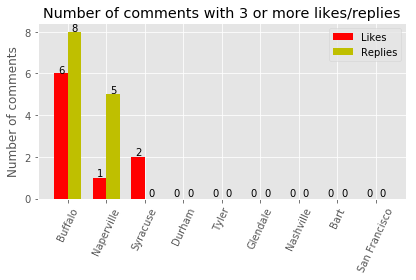

In [264]:
likes_replies_chart('Number of comments', 'Number of comments with 3 or more likes/replies', likes_x, likes_y, replies_x, replies_y, all_madison_dfs)

#### comments with 3 or more likes AND replies

In [276]:
high_replies_and_high_likes = likes_replies_analysis(3, ['num_likes', 'reply_ids_count'], all_cities_dataframe)

In [277]:
high_replies_and_high_likes.shape[0]

0

###### Conclusion: no comments with 3 or more likes AND replies

In [39]:
#comments with 2 or more likes AND replies
#high_replies_and_high_likes = likes_replies_analysis(2, ['num_likes', 'reply_ids_count'], all_cities_dataframe)

# 6) Authors' analysis

##### the following analysis was done after finding out details of the authors' on the internet (see authors_names.py)

In [81]:
authors_details_df = authors_details_dataframe(all_cities_dataframe)

In [82]:
authors_details_df.head(2)

,comment_id,author,Position,Company_name,Category_work,datetime,num_likes,quoted_text,comment_text,comment_text_aux,reply_ids,city_name
1,E4-XFnl1uKc,Aaron Lee,Software Developer,Solace Systems,Private,2017-01-25 04:32:19,2,None,I am in support of the proposed policy to furt...,<p>I am in support of the proposed policy to f...,[],Buffalo
2,E4-XFnjG3Ac,Aaron Lee,Software Developer,Solace Systems,Private,2017-01-25 04:25:20,0,public participation by providing regular oppo...,I would be interested to see this more finely ...,<p>I would be interested to see this more fine...,[],Buffalo


##### count just positions

In [83]:
count_positions = authors_details_df.drop_duplicates('author').reset_index()
count_just_positions = authors_details_analysis('Position', count_positions)
count_just_positions.head()

,index,Position,count
0,27,Unknown,27
1,21,Software Developer,7
2,3,Civic Technologist,4
3,19,Researcher,2
4,1,Assistant Professor,2


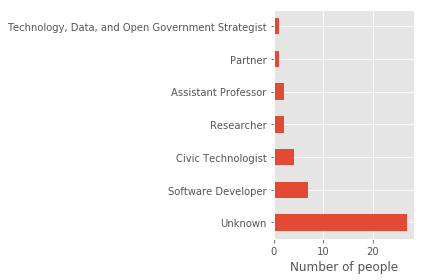

In [89]:
horizontal_bar_from_dataframe(count_just_positions.head(7), "Position", "count", "Number of people")

 ##### count just categories

In [90]:
count_just_categories = authors_details_analysis('Category_work', count_positions)
count_just_categories

,index,Category_work,count
0,6,Unknown,28
1,3,Private,13
2,1,Government,10
3,0,Academia (private),7
4,2,Not-for-profit,4
5,5,Public,2
6,4,Private/Cybersecurity,1


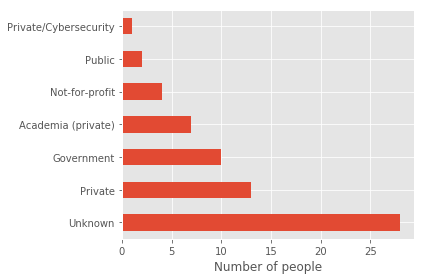

In [91]:
horizontal_bar_from_dataframe(count_just_categories, "Category_work", "count", "Number of people")

####  Position with city-wise analysis

In [92]:
count_positions1 = count_positions.groupby(['Position', 'city_name']).size().reset_index().rename(columns={0:'count'})

In [93]:
count_positions2 = count_positions1.sort_values(['city_name', 'count'], ascending=False)

In [102]:
# select only top two positions in each city
count_positions3 = count_positions2.groupby('city_name').head(2)

In [103]:
count_positions3

,Position,city_name,count
37,Unknown,Tyler,3
36,Unknown,Syracuse,5
25,Software Developer,Syracuse,2
10,Director for Open Participation and Communities,San Francisco,1
35,Unknown,San Francisco,1
24,Software Developer,Nashville,1
28,Statistician,Nashville,1
5,Civic Technologist,Naperville,3
3,Chief Data Officer,Naperville,1
32,Unknown,Glendale,7


In [104]:
position_list = count_positions3['Position'].tolist()
city_list = count_positions['city_name'].unique().tolist()

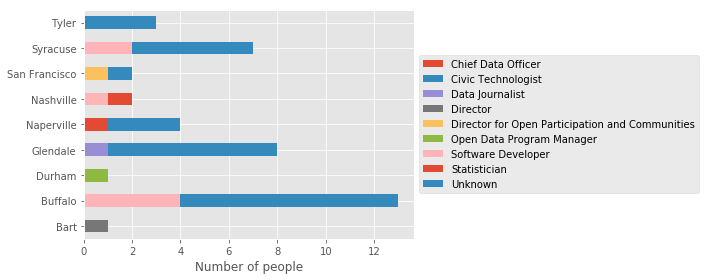

In [105]:
horizontal_stacked_bar_from_dataframe(count_positions3, "city_name", "Position", "count", "Number of people", "who-comments-the-most")